In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from functools import partial

%config InlineBackend.figure_formats = ['svg']

plt.style.use('dark_background')

In [2]:
G = 4*np.pi**2 # in units where x = AU, M = Msun, T = year

sun_mass = 1
earth_mass = 1/333000

In [3]:
def acceleration1body(x: np.array, total_mass: float):
    
    return - G*total_mass / (np.linalg.norm(x)**3) * x

In [4]:
def leapfrog_evolve(acceleration, x0: np.array, v0: np.array, t_min: float, t_max, n: float):
    
    x, v = x0, v0
    x_list, v_list = [x0], [v0]
    a = acceleration(x)
    
    dt = (t_max - t_min)/n
    t_eval = np.linspace(t_min+dt, t_max, n-1)
    
    for t in t_eval:

        # leapfrog iteration
        x = x + v * dt + .5 * a * dt**2
        b, a = a, acceleration(x)
        v = v + .5 * dt * (a + b)
        
        # save results
        x_list.append(x)
        v_list.append(v)
    
    index = np.insert(t_eval, 0, t_min)
    
    return np.array(x_list), np.array(v_list), index

In [5]:
x, v, t = leapfrog_evolve(
    partial(acceleration1body, total_mass=sun_mass),
    x0=np.array([1.0, 0.0]),
    v0=np.array([0.0, 6.2830]),
    t_min=0.0,
    t_max=2.0,
    n=500)

In [6]:
def energy(x, v, total_mass, reduced_mass):
    U = - G * total_mass / np.linalg.norm(x)
    T = reduced_mass * np.linalg.norm(v)**2/2
    
    return T+U

In [7]:
def angular_momentum(x, v, total_mass, reduced_mass):
    
    p = reduced_mass*v
    L = np.cross(x, p)
    
    return np.linalg.norm(L)

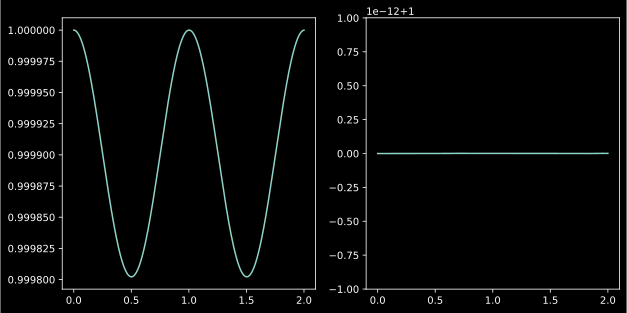

In [8]:
energy_series = pd.Series(
    [energy(xx, vv, total_mass=sun_mass, reduced_mass=earth_mass) for xx, vv in zip(x, v)],
    index=t
)

angular_momentum_series = pd.Series(
    [angular_momentum(xx, vv, total_mass=sun_mass, reduced_mass=earth_mass) for xx, vv in zip(x, v)],
    index=t
)

fig, ax = plt.subplots(figsize=(10,5), ncols=2)
(energy_series/energy_series.iloc[0]).plot(ax=ax[0])
(angular_momentum_series/angular_momentum_series.iloc[0]).plot(ax=ax[1])
plt.show()

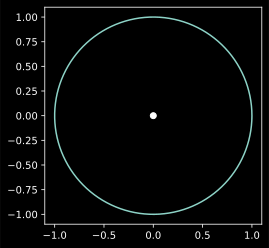

In [9]:
plt.plot(x[:,0], x[:,1])
plt.scatter(0,0, color='white')
plt.axis('scaled')
plt.show()

# Try new things

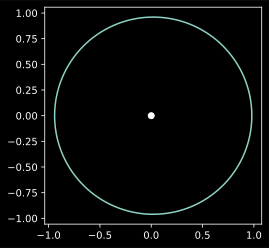

In [112]:
x, v, t = leapfrog_evolve(
    partial(acceleration1body, total_mass=sun_mass),
    x0=np.array([.98, 0.0]),
    v0=np.array([0.0, 6.2830]),
    t_min=0.0,
    t_max=1.0,
    n=1000)

plt.plot(x[:,0], x[:,1])
plt.scatter(0,0, color='white')
plt.axis('scaled')

plt.show()

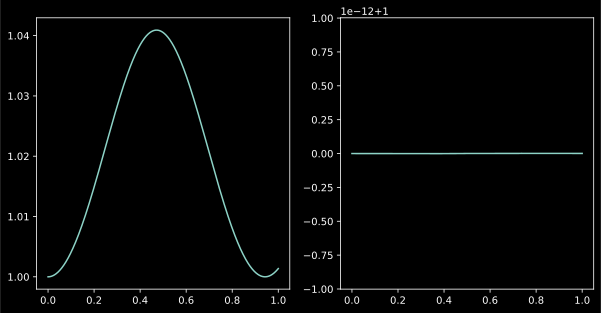

In [113]:
energy_series = pd.Series(
    [energy(xx, vv, total_mass=sun_mass, reduced_mass=earth_mass) for xx, vv in zip(x, v)],
    index=t
)

angular_momentum_series = pd.Series(
    [angular_momentum(xx, vv, total_mass=sun_mass, reduced_mass=earth_mass) for xx, vv in zip(x, v)],
    index=t
)

fig, ax = plt.subplots(figsize=(10,5), ncols=2)
(energy_series/energy_series.iloc[0]).plot(ax=ax[0])
(angular_momentum_series/angular_momentum_series.iloc[0]).plot(ax=ax[1])
plt.show()

In [135]:
x0 = np.array([0.5, 0.0])
v0 = np.array([0.0, 2*np.pi])

In [143]:
a = acceleration1body(x0, sun_mass)
x = x0
v = v0

x_list = []
v_list = []
E_list = []

dt = 0.001
for _ in range(int(1/dt)):
    u = v + a * dt/2
    x = x + u * dt
    a = acceleration1body(x, sun_mass)
    v = u + a * dt/2
    
    E = - G*sun_mass/np.linalg.norm(x) + np.linalg.norm(v)**2/2
    
    x_list.append(x)
    v_list.append(v)
    E_list.append(E)

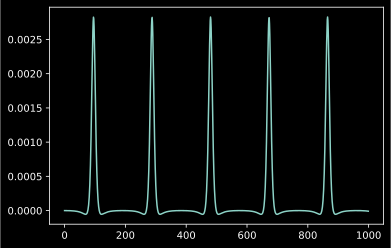

In [144]:
plt.plot(E_list/E_list[0]-1)